<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/EDA_Classifier_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA + Classifier + Streamlit on *Palmer Penguin* dataset

> Colab Author: [Manuel Romero/mrm8488](https://twitter.com/mrm8488)

> Idea and streamlit code: https://github.com/dataprofessor/penguins-heroku

In [1]:
!pip install -q streamlit

     |████████████████████████████████| 7.1MB 2.6MB/s 
     |████████████████████████████████| 112kB 40.2MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 501kB 49.0MB/s 
     |████████████████████████████████| 4.4MB 47.2MB/s 
     |████████████████████████████████| 122kB 50.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.1 which is incompatible.


Reset the exectuion environment after installing **streamlit**

## Download the dataset (already cleaned)

In [1]:
!wget https://raw.githubusercontent.com/dataprofessor/penguins-heroku/master/penguins_cleaned.csv

--2020-07-08 10:31:12--  https://raw.githubusercontent.com/dataprofessor/penguins-heroku/master/penguins_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15134 (15K) [text/plain]
Saving to: ‘penguins_cleaned.csv’

penguins_cleaned.cs 100%[===================>]  14.78K  --.-KB/s    in 0.01s   

2020-07-08 10:31:12 (1.21 MB/s) - ‘penguins_cleaned.csv’ saved [15134/15134]



## A bit of EDA

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('penguins_cleaned.csv')

In [4]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [6]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
data.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

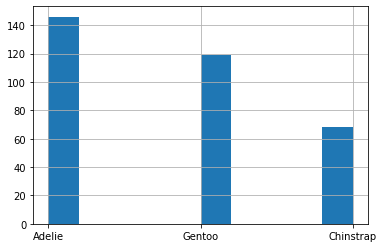

In [8]:
data.species.hist()

In [9]:
data.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

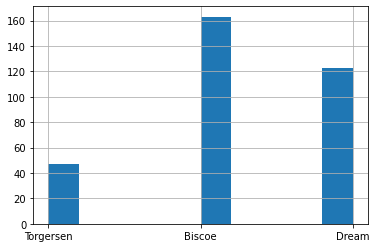

In [10]:
data.island.hist()

In [11]:
encode = ['sex','island']
for col in encode:
    dummy = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data,dummy], axis=1)
    del data[col]

In [12]:
data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181,3750,0,1,0,0,1
1,Adelie,39.5,17.4,186,3800,1,0,0,0,1
2,Adelie,40.3,18.0,195,3250,1,0,0,0,1
3,Adelie,36.7,19.3,193,3450,1,0,0,0,1
4,Adelie,39.3,20.6,190,3650,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,0,1,0,1,0
329,Chinstrap,43.5,18.1,202,3400,1,0,0,1,0
330,Chinstrap,49.6,18.2,193,3775,0,1,0,1,0
331,Chinstrap,50.8,19.0,210,4100,0,1,0,1,0


## Create the Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [17]:
clf = RandomForestClassifier()

In [18]:
y = data.pop('species')

In [19]:
y

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
328    Chinstrap
329    Chinstrap
330    Chinstrap
331    Chinstrap
332    Chinstrap
Name: species, Length: 333, dtype: object

In [20]:
dummies = pd.get_dummies(y)
y = pd.concat([y,dummies], axis=1)

In [21]:
del y['species']

In [22]:
y

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
328,0,1,0
329,0,1,0
330,0,1,0
331,0,1,0


In [23]:
X = data

In [24]:
test_size = 0.33

In [25]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=7)

In [26]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
clf.score(X_test, Y_test)

0.990909090909091

## Manual test of the model

In [28]:
clf.predict(X[:1])

array([[1, 0, 0]], dtype=uint8)

In [29]:
y[:1]

,Adelie,Chinstrap,Gentoo
0,1,0,0


In [30]:
clf.predict(X[-1:])

array([[0, 1, 0]], dtype=uint8)

In [72]:
clf.predict_proba(X[-1:])

[array([[1., 0.]]), array([[0., 1.]]), array([[1., 0.]])]

In [32]:
y[-1:]

,Adelie,Chinstrap,Gentoo
332,0,1,0


In [33]:
clf.predict(X[146:147])

array([[0, 0, 1]], dtype=uint8)

In [35]:
y[146:147]

,Adelie,Chinstrap,Gentoo
146,0,0,1


In [46]:
clf.predict([[44.7600, 13.7400, 211.4000, 4500, 1, 0, 1, 0, 0]])

array([[0, 0, 1]], dtype=uint8)

In [36]:
import pickle

In [37]:
filename = 'penguins_clf.pkl'
pickle.dump(clf, open(filename, 'wb'))

## Create the streamlit App

In [66]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier

st.write("""

![palmerpenguins](https://miro.medium.com/max/1200/1*xJ6_zgmEEfI2BT0sRXP5cw.png)
# Penguin Prediction App

This app predicts the **Palmer Penguin** species!

Data obtained from the [palmerpenguins library](https://github.com/allisonhorst/palmerpenguins) in R by Allison Horst.
""")

st.sidebar.header('User Input Features')

st.sidebar.markdown("""
[Example CSV input file](https://raw.githubusercontent.com/dataprofessor/data/master/penguins_example.csv)
""")

# Collects user input features into dataframe
uploaded_file = st.sidebar.file_uploader("Upload your input CSV file", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
else:
    def user_input_features():
        island = st.sidebar.selectbox('Island',('Biscoe','Dream','Torgersen'))
        sex = st.sidebar.selectbox('Sex',('male','female'))
        bill_length_mm = st.sidebar.slider('Bill length (mm)', 32.1,59.6,43.9)
        bill_depth_mm = st.sidebar.slider('Bill depth (mm)', 13.1,21.5,17.2)
        flipper_length_mm = st.sidebar.slider('Flipper length (mm)', 172.0,231.0,201.0)
        body_mass_g = st.sidebar.slider('Body mass (g)', 2700.0,6300.0,4207.0)
        data = {'island': island,
                'bill_length_mm': bill_length_mm,
                'bill_depth_mm': bill_depth_mm,
                'flipper_length_mm': flipper_length_mm,
                'body_mass_g': body_mass_g,
                'sex': sex}
        features = pd.DataFrame(data, index=[0])
        return features
        print(features)
    input_df = user_input_features()

# Combines user input features with entire penguins dataset
# This will be useful for the encoding phase
penguins_raw = pd.read_csv('penguins_cleaned.csv')
penguins = penguins_raw.drop(columns=['species'])
df = pd.concat([input_df,penguins],axis=0)

# Encoding of ordinal features
# https://www.kaggle.com/pratik1120/penguin-dataset-eda-classification-and-clustering
encode = ['sex','island']
for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]
df = df[:1] # Selects only the first row (the user input data)

# Displays the user input features
st.subheader('User Input features')

if uploaded_file is not None:
    st.write(df)
else:
    st.write('Awaiting CSV file to be uploaded. Currently using example input parameters (shown below).')
    st.write(df)

# Reads in saved classification model
load_clf = pickle.load(open('penguins_clf.pkl', 'rb'))

# Apply model to make predictions
prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)


st.subheader('Prediction')
penguins_species = np.array(['Adelie','Chinstrap','Gentoo'])
#st.write(prediction)
st.write(penguins_species[np.argmax(prediction)])

st.subheader('Prediction Probability')
st.write(prediction_proba)

Overwriting app.py


## Install ngrok

In [39]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-07-08 10:35:53--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.86.203.217, 52.207.47.153, 52.203.87.192, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.86.203.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  65.9MB/s    in 0.2s    

2020-07-08 10:35:53 (65.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [40]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


Execute the following cells **everytime you stop the streamlit app and modify it**

In [68]:
get_ipython().system_raw('./ngrok http 8501 &')

In [69]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://8eb372b6d901.ngrok.io


In [70]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.74.0.62:8501

  Stopping...
